In [1]:
import numpy as np
import pandas as pd
import csv
import time

In [2]:
# 手动添加特征，训练集42，测试集41

feather = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 
           'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell', 'lsu_attempted', 'lnum_root', 'lnum_file_creations', 
           'lnum_shells', 'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 
           'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 
           'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
           'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

In [ ]:
len(feather)

In [ ]:
# 未经处理的原始数据
TRAIN = 'C:\\Users\\Qin\\Desktop\\train_10_percent_kddcup\\train_10_percent_kddcup.DATA_10_PERCENT_CORRECTED'
# 这个测试集不带标签，直接用corrected，标签和数据一起处理
# TEST = 'C:\\Users\\Qin\\Desktop\\test_10_percent_kddcup\\test_10_percent_kddcup.UNLABELED_10_PERCENT'
TEST = 'C:\\Users\\Qin\\Desktop\\corrected\\corrected'
# NEWTEST = 'C:\\Users\\Qin\\Desktop\\test_10_percent_kddcup\\newtest_10_percent_kddcup.NEWTESTDATA_10_PERCENT_UNLABELED'

In [ ]:
train = pd.read_csv(TRAIN, header = None, names = feather)
# 测试集特征取前41个
test = pd.read_csv(TEST, header = None, names = feather)

In [ ]:
train

In [ ]:
print('different types of protocol_type:{}'.format(train['protocol_type'].unique()))

In [ ]:
print('different types of services:{}'.format(train['service'].unique()))

In [ ]:
print('different types of flag:{}'.format(train['flag'].unique()))

In [ ]:
print('different types of label:{}'.format(train['label'].unique()))

In [ ]:
global label_list  #label_list为全局变量
 
#定义kdd99数据预处理函数
def preHandel_data(Read_path, Write_path):
    source_file = Read_path
    handled_file = Write_path
    data_file=open(handled_file, 'w', newline = '')     #python3.x中添加newline=''这一参数使写入的文件没有多余的空行
    with open(source_file, 'r') as data_source:
        csv_reader = csv.reader(data_source)
        csv_writer = csv.writer(data_file)
        count = 0   #记录数据的行数，初始化为0
        for row in csv_reader:
            temp_line = np.array(row)   #将每行数据存入temp_line数组里
            temp_line[1] = handleProtocol(row)   #将源文件行中3种协议类型转换成数字标识
            temp_line[2] = handleService(row)    #将源文件行中70种网络服务类型转换成数字标识
            temp_line[3] = handleFlag(row)       #将源文件行中11种网络连接状态转换成数字标识
            temp_line[41] = handleLabel(row)   #将源文件行中23种攻击类型转换成数字标识
            csv_writer.writerow(temp_line)
            count += 1
            #输出每行数据中所修改后的状态
            print(count, 'status:', temp_line[1], temp_line[2], temp_line[3], temp_line[41])
        data_file.close()
 
 
#将相应的非数字类型转换为数字标识即符号型数据转化为数值型数据
def find_index(x,y):
    return [i for i in range(len(y)) if y[i]==x]
 
#定义将源文件行中3种协议类型转换成数字标识的函数
def handleProtocol(input):
    protocol_list=['tcp','udp','icmp']
    if input[1] in protocol_list:
        return find_index(input[1],protocol_list)[0]

#  定义将源文件行中70种网络服务类型转换成数字标识的函数
def handleService(input):
   service_list=['aol','auth','bgp','courier','csnet_ns','ctf','daytime','discard','domain','domain_u',
                 'echo','eco_i','ecr_i','efs','exec','finger','ftp','ftp_data','gopher','harvest','hostnames',
                 'http','http_2784','http_443','http_8001','imap4','IRC','iso_tsap','klogin','kshell','ldap',
                 'link','login','mtp','name','netbios_dgm','netbios_ns','netbios_ssn','netstat','nnsp','nntp',
                 'ntp_u','other','pm_dump','pop_2','pop_3','printer','private','red_i','remote_job','rje','shell',
                 'smtp','sql_net','ssh','sunrpc','supdup','systat','telnet','tftp_u','tim_i','time','urh_i','urp_i',
                 'uucp','uucp_path','vmnet','whois','X11','Z39_50']
   if input[2] in service_list:
       return find_index(input[2],service_list)[0]
 
#定义将源文件行中11种网络连接状态转换成数字标识的函数
def handleFlag(input):
    flag_list=['OTH','REJ','RSTO','RSTOS0','RSTR','S0','S1','S2','S3','SF','SH']
    if input[3] in flag_list:
        return find_index(input[3],flag_list)[0]
    
# 定义将源文件行中攻击类型转换成数字标识的函数(训练集***出现了22个攻击类型，而剩下的17种只在测试集中出现)
def handleLabel(input):
    #label_list=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.',
    # 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.',
    # 'back.', 'imap.', 'satan.', 'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
    # 'spy.', 'rootkit.']
    global label_list  #在函数内部使用全局变量并修改它
    if input[41] in label_list:
        return find_index(input[41],label_list)[0]
    else:
        label_list.append(input[41])
        return find_index(input[41],label_list)[0]

In [3]:
TRAIN_DATA_PATH = 'C:\\Users\\Qin\\Desktop\\kddcup\\train_10_percent_kddcup.csv'
TEST_DATA_PATH = 'C:\\Users\\Qin\\Desktop\\kddcup\\test_10_percent_kddcup.csv'
# TEST_LABEL_PATH = 'C:\\Users\\Qin\\Desktop\\corrected\\corrected.csv'
# NEWTEST_DATA_PATH = 'C:\\Users\\Qin\\Desktop\\test_10_percent_kddcup\\newtest_10_percent_kddcup.csv'

In [ ]:
# 训练集预处理
start_time=time.clock()
global label_list   #声明一个全局变量的列表并初始化为空
label_list=[]
preHandel_data(TRAIN, TRAIN_DATA_PATH)
end_time=time.clock()
print("Running time:",(end_time-start_time))  #输出程序运行时间

In [ ]:
# 测试集预处理
start_time=time.clock()
global label_list   #声明一个全局变量的列表并初始化为空
label_list=[]
preHandel_data(TEST, TEST_DATA_PATH)
end_time=time.clock()
print("Running time:",(end_time-start_time))  #输出程序运行时间

In [4]:
train = pd.read_csv(TRAIN_DATA_PATH, header = None, names = feather)
test_df = pd.read_csv(TEST_DATA_PATH, header = None, names = feather)

C:\Users\Qin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
test_label = test_df['label']
test_df = test_df.iloc[ : , : 41]

In [5]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,21,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,0
1,0,0,21,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0
2,0,0,21,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
3,0,0,21,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
4,0,0,21,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,0,21,9,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
494017,0,0,21,9,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
494018,0,0,21,9,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494019,0,0,21,9,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


In [160]:
t12 = train[train['service'] == 12]
tt = train[train['service'] != 12]

In [165]:
t12.iloc[ : , 2] = 21

C:\Users\Qin\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [169]:
frame = [t12, tt]
final = pd.concat(frame)
final

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
833,0,2,21,9,30,0,0,0,0,0,...,5,1.0,0.0,1.00,0.40,0.00,0.00,0.0,0.0,0
834,0,2,21,9,30,0,0,0,0,0,...,15,1.0,0.0,1.00,0.13,0.00,0.00,0.0,0.0,0
835,0,2,21,9,30,0,0,0,0,0,...,25,1.0,0.0,1.00,0.08,0.00,0.00,0.0,0.0,0
836,0,2,21,9,30,0,0,0,0,0,...,35,1.0,0.0,1.00,0.06,0.00,0.00,0.0,0.0,0
837,0,2,21,9,30,0,0,0,0,0,...,45,1.0,0.0,1.00,0.04,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,0,21,9,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
494017,0,0,21,9,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
494018,0,0,21,9,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494019,0,0,21,9,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


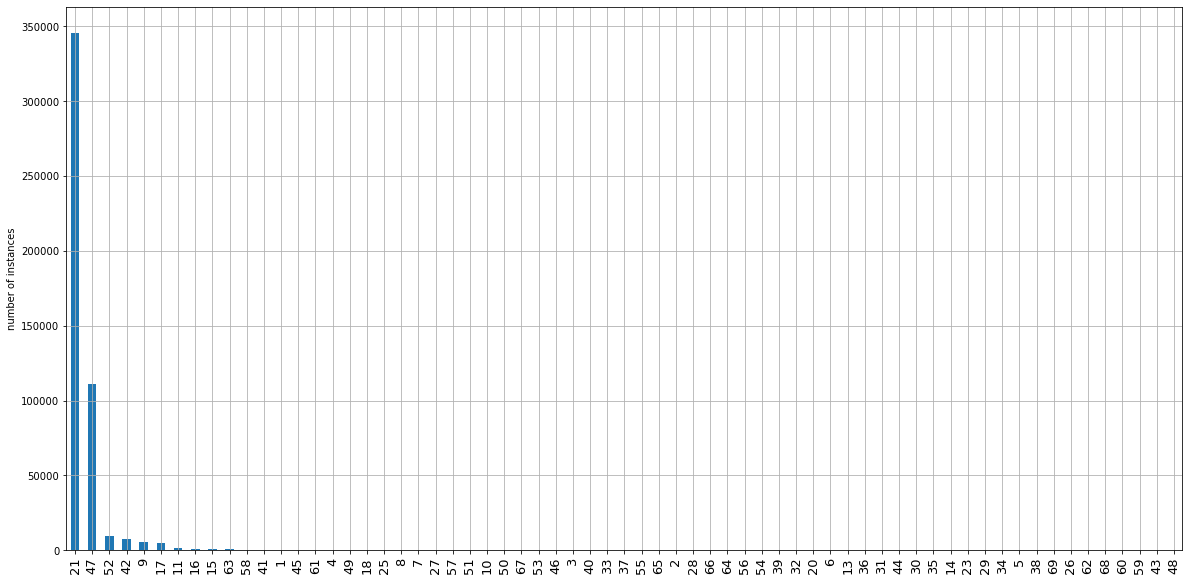

In [171]:
# train
pd.value_counts(final['service']).plot(kind = 'bar', figsize = (20, 10))
plt.ylabel('number of instances')
plt.xticks(fontsize = 13)
plt.grid()
plt.show()

In [6]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
import pandas as pd

In [140]:
temp = pd.DataFrame(columns = feather)

In [141]:
for i in range(0, 69) :
    a = train[train['service'] == i]
    if i == 21 :
        b = a[ : 30000]
    else :
        if len(a) > 100 :
            a = a[ : 100]
            frame = [temp, a]
            temp = pd.concat(frame)
        else : 
            a = a
            frame = [temp, a]
            temp = pd.concat(frame)
frame = [temp, b]
temp = pd.concat(frame)

In [142]:
temp

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
221,0,0,1,9,9,35,0,0,0,0,...,12,0.11,0.11,0.03,0.17,0.0,0.0,0.0,0.0,0
227,0,0,1,9,9,37,0,0,0,0,...,17,0.09,0.05,0.01,0.12,0.0,0.0,0.0,0.0,0
825,0,0,1,9,10,39,0,0,0,0,...,8,0.21,0.08,0.03,0.00,0.0,0.0,0.0,0.0,0
923,0,0,1,9,9,36,0,0,0,0,...,17,0.86,0.29,0.14,0.18,0.0,0.0,0.0,0.0,0
3584,0,0,1,9,9,34,0,0,0,0,...,4,0.13,0.13,0.03,0.00,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38231,0,0,21,9,200,1425,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0
38232,0,0,21,9,251,1751,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0
38233,0,0,21,9,245,2445,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0
38234,0,0,21,9,252,2362,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0


In [143]:
temp.index = range(len(temp))
temp

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,1,9,9,35,0,0,0,0,...,12,0.11,0.11,0.03,0.17,0.0,0.0,0.0,0.0,0
1,0,0,1,9,9,37,0,0,0,0,...,17,0.09,0.05,0.01,0.12,0.0,0.0,0.0,0.0,0
2,0,0,1,9,10,39,0,0,0,0,...,8,0.21,0.08,0.03,0.00,0.0,0.0,0.0,0.0,0
3,0,0,1,9,9,36,0,0,0,0,...,17,0.86,0.29,0.14,0.18,0.0,0.0,0.0,0.0,0
4,0,0,1,9,9,34,0,0,0,0,...,4,0.13,0.13,0.03,0.00,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35758,0,0,21,9,200,1425,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0
35759,0,0,21,9,251,1751,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0
35760,0,0,21,9,245,2445,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0
35761,0,0,21,9,252,2362,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0


In [144]:
label = temp['service']

In [145]:
tsne = TSNE(n_components=2, init='pca', random_state=1)

In [147]:
result = tsne.fit_transform(temp)
result

array([[-4149.2383  ,  -224.8991  ],
       [-4159.7256  ,  -217.86096 ],
       [-4150.1655  ,  -229.20857 ],
       ...,
       [-1817.8112  ,   -47.566887],
       [-1916.4078  ,   -33.461033],
       [-3322.937   ,    -4.66256 ]], dtype=float32)

In [146]:
label[35700]

21

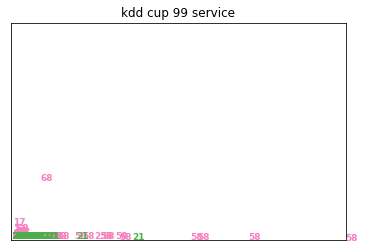

In [149]:
# draw 2-dimension pic

x_min, x_max = np.min(result), np.max(result)

# 这一步似乎让结果都变为0-1的数字
result = (result - x_min)/(x_max-x_min)
fig = plt.figure()
# subplot可以画出一个矩形，长宽由参数的前两位确定，参数越大，边长越小
ax = plt.subplot(111)
for i in range(result.shape[0]):
    if label[i] == 21 :
        plt.text(result[i,0], result[i,1], str(label[i]), color=plt.cm.Set1(21 / 70.), fontdict={'weight': 'bold','size': 9})
    else :
        plt.text(result[i,0], result[i,1], str(label[i]), color=plt.cm.Set1(58 / 70.), fontdict={'weight': 'bold','size': 9})
    
plt.xticks([])
plt.yticks([])
plt.title('kdd cup 99 service')
plt.show(fig)